In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import re
from collections import Counter
pd.set_option('display.max_rows', 10000)
os.chdir('C:/Users/tjame/Documents/Curious Learning')

In [3]:
#taking from csv of queried data
gamePlay= pd.read_csv("gameplay-3.11.csv")

#taking from json of entire user engagement data
engageData = []
with open('Data_Exports_311_User_Engagement.txt') as f:
    for line in f:
        engageData.append(json.loads(line))

In [4]:
gamePlay.head() #contains the queried dataframe of only gameplay events 

,ID,Key,StringValue
0,02a8154f671eca4a7e1ed9c6a9a52f1c,action,SegmentSuccess_Level_36
1,02a8154f671eca4a7e1ed9c6a9a52f1c,action,SegmentSuccess_Level_33
2,02a8154f671eca4a7e1ed9c6a9a52f1c,action,LevelSuccess_34
3,02a8154f671eca4a7e1ed9c6a9a52f1c,action,SelectMonster Larva Evolve_1
4,02a8154f671eca4a7e1ed9c6a9a52f1c,action,SegmentSuccess_Level_30


In [8]:
n = list(range(6604))

#list of unique users
uniqueUsers = []
for i in engageData:
    if i['user_pseudo_id'] not in uniqueUsers:
        uniqueUsers.append(i['user_pseudo_id'])

Text(0.5, 0, 'Number of minutes')

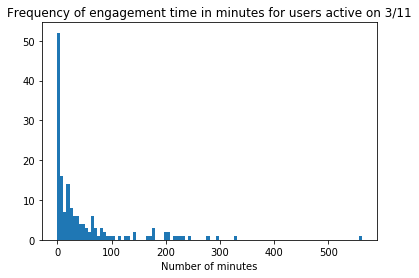

In [9]:
userEngage = dict()
count = 0
while (count<len(uniqueUsers)):
    userEngage[uniqueUsers[count]] = 0
    count=count+1        


for i in uniqueUsers:
    for j in engageData:
        if(len(j['event_params']) == 5):
            if(j['user_pseudo_id'] == i):
                userEngage[i] = userEngage[i]+ (int(j['event_params'][3]['value']['int_value']))/(60*1000)
            else:
                pass

#shift values+1
plt.hist(userEngage.values(), bins =100)
plt.title("Frequency of engagement time in minutes for users active on 3/11")
plt.xlabel("Number of minutes")


In [20]:
import numpy as np

print("Mean: " + str(np.array(list(userEngage.values()).mean()))
print(np.array("Max: " + str(list(userEngage.values()).max())))
print(np.median("Median: " + str(list(userEngage.values()))))

SyntaxError: invalid syntax (<ipython-input-20-f24865172715>, line 4)

In [7]:
#finding total engagement time using engagment data
totalEngageTime = 0
count = 0 
for i in engageData:
    #this is for microevents that last a second each 
    if (i['event_params'][0]['key'] == 'firebase_event_origin'):
        totalEngageTime = totalEngageTime + int(i['event_params'][1]['value']['int_value'])
    #this is for main app events
    else:
        totalEngageTime = totalEngageTime + int(i['event_params'][3]['value']['int_value'])
        
engageInMins = totalEngageTime/(1000*60)
engageInHours = totalEngageTime/(1000*60*60)

eventTypes =[]
gameplayEngageTime=0
for i in engageData:
    if(len(i['event_params']) == 5):
        gameplayEngageTime = gameplayEngageTime + int(i['event_params'][3]['value']['int_value'])
        if(i['event_params'][4]['value']['string_value'] not in eventTypes):
            eventTypes.append(i['event_params'][4]['value']['string_value'])  
        
eventTypes.sort()

gamePlayInMins = gameplayEngageTime/(1000*60)
gamePlayInHours = gameplayEngageTime/(1000*60*60)

print(gameplayEngageTime)

print('The total engagement time in minutes was ' + str(round(engageInMins,2)) + ', of which ' + str(round(gamePlayInMins,2)) +
      ' of those minutes were for GamePlay events. \nThe total engagement time in hours was ' + 
      str(round(engageInHours,2))+ ', of which ' + str(round(gamePlayInHours,2)) +
      ' of those hours were for GamePlay events.')

488908245
The total engagement time in minutes was 8275.05, of which 8148.47 of those minutes were for GamePlay events. 
The total engagement time in hours was 137.92, of which 135.81 of those hours were for GamePlay events.


In [18]:
#test if there are userengage events in json without unique_user_id
test = []
for i in engageData:
    if i['user_pseudo_id'] not in test:
        test.append(i['user_pseudo_id'])
 

for i in uniqueUsers:
    test.remove(i)
    
test2 =[]
for i in engageData:
    if i['user_pseudo_id'] in test:
        test2.append((j['event_params']))

[[{'key': 'firebase_screen_class',
   'value': {'string_value': 'UnityPlayerActivity'}},
  {'key': 'firebase_event_origin', 'value': {'string_value': 'auto'}},
  {'key': 'firebase_screen_id', 'value': {'int_value': '1081526377363888135'}},
  {'key': 'engagement_time_msec', 'value': {'int_value': '6600'}}],
 [{'key': 'firebase_screen_class',
   'value': {'string_value': 'UnityPlayerActivity'}},
  {'key': 'firebase_event_origin', 'value': {'string_value': 'auto'}},
  {'key': 'firebase_screen_id', 'value': {'int_value': '1081526377363888135'}},
  {'key': 'engagement_time_msec', 'value': {'int_value': '6600'}}],
 [{'key': 'firebase_screen_class',
   'value': {'string_value': 'UnityPlayerActivity'}},
  {'key': 'firebase_event_origin', 'value': {'string_value': 'auto'}},
  {'key': 'firebase_screen_id', 'value': {'int_value': '1081526377363888135'}},
  {'key': 'engagement_time_msec', 'value': {'int_value': '6600'}}],
 [{'key': 'firebase_screen_class',
   'value': {'string_value': 'UnityPlayer

In [9]:
#gets description of top user and frequency of that user in the data
gamePlay.describe()

,ID,Key,StringValue
count,6604,6604,6374
unique,115,7,930
top,50fe6f813b31059a0306d1e9452be2be,action,UnityPlayerActivity
freq,467,2840,115


In [6]:
gamePlay['StringValue'].value_counts(dropna=False)

NaN                              230
UnityPlayerActivity              115
app                              115
5 puzzles                         79
Puzzle Letter: t                  79
Monster Select                    74
Puzzle Letter: c                  73
Puzzle Letter: p                  72
4 puzzles                         67
Puzzle Letter: a                  63
Puzzle Sound Letter: n            60
SegmentStart_Level_1              57
Puzzle Sound Letter: p            55
SegmentSuccess_Level_1            54
Puzzle Letter: m                  48
SegmentStart_Level_2              47
LevelSuccess_1                    47
Puzzle Sound Letter: a            39
Puzzle Letter In Word: n          38
SegmentSuccess_Level_2            38
Puzzle Letter In Word: p          36
3 puzzles                         36
Puzzle Letter In Word: t          35
Puzzle Word: ted                  35
SegmentStart_Level_3              35
Puzzle Word: wed                  34
Puzzle Sound Word: ten            34
P

In [7]:
gamePlay['Key'].value_counts(dropna=True)


action                   2840
label                    1973
firebase_screen          1331
value                     115
firebase_screen_id        115
firebase_screen_class     115
firebase_event_origin     115
Name: Key, dtype: int64

Text(0.5, 0, 'Number of events completed')

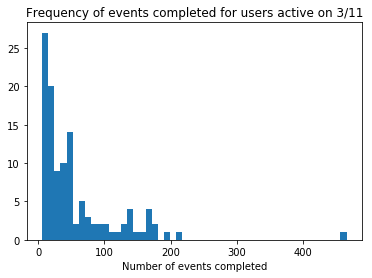

In [17]:
#hist for events for users

usersInfo = dict()
usersInfo[gamePlay.iloc[0][0]] =[]

currentUser = gamePlay.iloc[0][0]
for i in n:
    if (currentUser == gamePlay.iloc[i][0]):
        usersInfo[gamePlay.iloc[i][0]].append(gamePlay.iloc[i][2])
    else:
        currentUser = gamePlay.iloc[i][0]
        usersInfo[gamePlay.iloc[i][0]]=[]

eventsCount = dict()     

for user in usersInfo:
    eventsCount[user]=len(usersInfo[user])

plt.hist(eventsCount.values(), bins = 50)
plt.title("Frequency of events completed for users active on 3/11")
plt.xlabel("Number of events completed")

In [15]:
##create method for natural sorting (sorting strings with numbers)
# =============================================================================
def atoi(text):
     return int(text) if text.isdigit() else text
 
def natural_keys(text):
     '''
     alist.sort(key=natural_keys) sorts in human order
     http://nedbatchelder.com/blog/200712/human_sorting.html
     (See Toothy's implementation in the comments)
     '''
     return [ atoi(c) for c in re.split(r'(\d+)', text) ]
# =============================================================================

Text(0.5, 0, 'Number of levels completed')

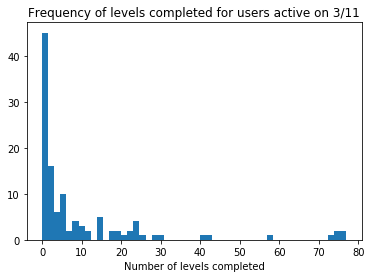

In [23]:
#hist of total number of levels completed per user

#dictionary of first level and last level successses
levelSuccess = dict()

for key, value in usersInfo.items():
    levelSuccess[key] =[] 
    
    lvls =[]
    for i in value:
        if isinstance(i, str):
            if i[0:6] == 'LevelS':
                lvls.append(i)
    lvls.sort(key=natural_keys)
    
    if not lvls:
        startLevel = "No level completed"
        endLevel = "No level completed"
        
    else:
        startLevel = lvls[0]
        endLevel = lvls[len(lvls)-1]
    
    levelSuccess[key].append(startLevel)
    levelSuccess[key].append(endLevel)

totalCompleted = dict()

for i in uniqueUsers:
    ignore= ('True' if levelSuccess.get(i) else 'False')

    if (ignore == 'False'):
        pass
    else:
        if (levelSuccess[i][0] == 'No level completed'):
            totalCompleted[i] = 0
        else:
            a = levelSuccess[i][0]
            b = levelSuccess[i][1]
            
            a1 = int(float(re.sub('[^0-9]','', a)))
            b1 = int(float(re.sub('[^0-9]','', b)))
            
    
            levelSuccess[i][0] = a1
            levelSuccess[i][1] = b1
            
            totalCompleted[i] = (b1-a1+1)
            
plt.hist(totalCompleted.values(), bins =50)
plt.title("Frequency of total amount of levels completed for users active on 3/11")
plt.xlabel("Number of levels completed")

In [20]:
#finds all the gameplay events of top user 
import operator
topUserID = max(totalCompleted.items(), key=operator.itemgetter(1))[0]
topUser = (gamePlay.loc[gamePlay['ID'] == topUserID])['StringValue'].tolist()

levels = []
for i in topUser:
    if isinstance(i, str):
        if i[0:6] == 'LevelS':
            levels.append(i)

levels.sort(key=natural_keys)
levels#gives all completed levels

['LevelSuccess_1',
 'LevelSuccess_2',
 'LevelSuccess_3',
 'LevelSuccess_4',
 'LevelSuccess_5',
 'LevelSuccess_6',
 'LevelSuccess_7',
 'LevelSuccess_8',
 'LevelSuccess_9',
 'LevelSuccess_10',
 'LevelSuccess_11',
 'LevelSuccess_12',
 'LevelSuccess_13',
 'LevelSuccess_14',
 'LevelSuccess_15',
 'LevelSuccess_16',
 'LevelSuccess_17',
 'LevelSuccess_18',
 'LevelSuccess_19',
 'LevelSuccess_20',
 'LevelSuccess_21',
 'LevelSuccess_22',
 'LevelSuccess_23',
 'LevelSuccess_24',
 'LevelSuccess_25',
 'LevelSuccess_26',
 'LevelSuccess_27',
 'LevelSuccess_28',
 'LevelSuccess_29',
 'LevelSuccess_30',
 'LevelSuccess_31',
 'LevelSuccess_32',
 'LevelSuccess_33',
 'LevelSuccess_34',
 'LevelSuccess_35',
 'LevelSuccess_36',
 'LevelSuccess_37',
 'LevelSuccess_38',
 'LevelSuccess_39',
 'LevelSuccess_40',
 'LevelSuccess_41',
 'LevelSuccess_42',
 'LevelSuccess_43',
 'LevelSuccess_44',
 'LevelSuccess_45',
 'LevelSuccess_46',
 'LevelSuccess_47',
 'LevelSuccess_48',
 'LevelSuccess_49',
 'LevelSuccess_50',
 'LevelSu

Text(0.5, 0, 'Level Failed')

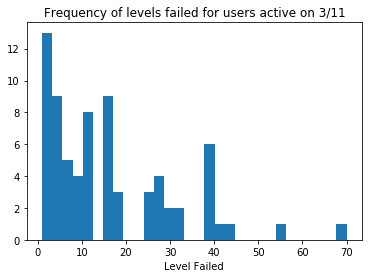

In [26]:
#hist of frequency of specific levels failed

#dictionary of first and last level failures. First value shows first level failed. Second value shows last level failed.
levelFail = dict()
for key, value in usersInfo.items():
    levelFail[key] =[] 
    
    lvls =[]
    for i in value:
        if isinstance(i, str):
            if i[0:6] == 'LevelF':
                lvls.append(i)
    lvls.sort(key=natural_keys)
    
    if not lvls:
        startLevel = "No level Failed"
        endLevel = "No level Failed"
        
    else:
        startLevel = lvls[0]
        endLevel = lvls[len(lvls)-1]
    
    levelFail[key].append(startLevel)
    levelFail[key].append(endLevel)

for i in uniqueUsers:
    ignore= ('True' if levelSuccess.get(i) else 'False')

    if (ignore == 'False'):
        pass
    else:
        if (levelFail[i][0] == 'No level Failed'):
            pass
        else:
            a = levelFail[i][0]
            b = levelFail[i][1]
            
            a1 = int(float(re.sub('[^0-9]','', a)))
            b1 = int(float(re.sub('[^0-9]','', b)))
            
    
            levelFail[i][0] = a1
            levelFail[i][1] = b1

failed =[]
for i in levelFail.values():
    if (i == ['No level Failed', 'No level Failed']):
        pass
    else:
        if(failed.append(i[0]) == failed.append(i[1])):
            failed.append(i[0])
        else:
            failed.append(i[0])
            failed.append(i[1])
            
            
plt.hist(failed, bins =30)
plt.title("Frequency of levels failed for users active on 3/11")
plt.xlabel("Level Failed")

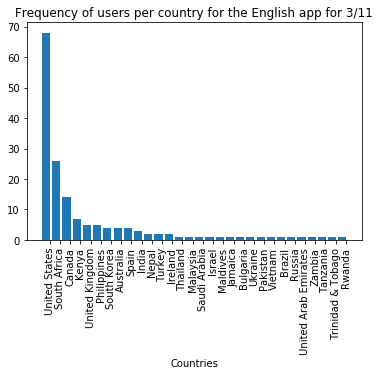

In [35]:
#hist of countries vs active user
import numpy as np

userCountry = dict()

count = 0
while (count<len(uniqueUsers)):
    userCountry[uniqueUsers[count]] = ''
    count=count+1  

for i in uniqueUsers:
    if (userCountry[i]==''):
        found = False
        x =0
        while (not found):
            if (engageData[x]['user_pseudo_id'] == i):
                userCountry[i] = engageData[x]['geo']['country']
                found = True
            else:
                x =x+1

uC = list(userCountry.values())

counts = Counter(uC)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of users per country for the English app for 3/11")
plt.xlabel("Countries")
plt.show()


In [36]:
labels

array(['United States', 'South Africa', 'Canada', 'Kenya',
       'United Kingdom', 'Philippines', 'South Korea', 'Australia',
       'Spain', 'India', 'Nepal', 'Turkey', 'Ireland', 'Thailand',
       'Malaysia', 'Saudi Arabia', 'Israel', 'Maldives', 'Jamaica',
       'Bulgaria', 'Ukraine', 'Pakistan', 'Vietnam', 'Brazil', 'Russia',
       'United Arab Emirates', 'Zambia', 'Tanzania', 'Trinidad & Tobago',
       'Rwanda'], dtype='<U20')

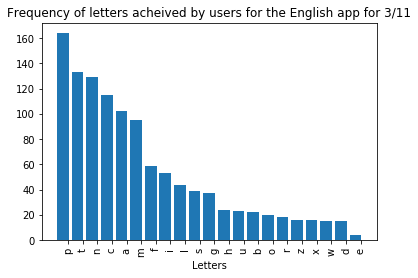

In [29]:
#hist of letters vs users
usersLetter = dict()


for user in usersInfo:
    usersLetter[user]=[]
    for i in usersInfo[user]:
        if (isinstance(i, str)):
            if i[0:13] == 'Puzzle Letter':
                letter = i[-1:]
                usersLetter[user].append(letter)
            if i[0:19] == 'Puzzle Sound Letter':
                letter = i[-1:]
                usersLetter[user].append(letter)
                
uLet = list(usersLetter.values())
uL=[]
for i in uLet:
    for j in i:
        uL.append(j)

counts = Counter(uL)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of letters acheived by users for the English app for 3/11")
plt.xlabel("Letters")
plt.show()

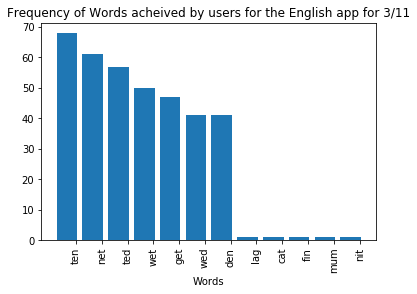

In [30]:
#hist of words vs users

usersWords = dict()


for user in usersInfo:
    usersWords[user]=[]
    for i in usersInfo[user]:
        if (isinstance(i, str)):
            if i[0:11] == 'Puzzle Word':
                word = i.split(": ", 1)[1]
                usersWords[user].append(word)
            if i[0:17] == 'Puzzle Sound Word':
                word = i.split(": ", 1)[1]
                usersWords[user].append(word)
                
uWords = list(usersWords.values())
uW=[]
for i in uWords:
    for j in i:
        uW.append(j)

counts = Counter(uW)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of Words acheived by users for the English app for 3/11")
plt.xlabel("Words")
plt.show()